In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.cross_validation import train_test_split
import numpy as np
import time

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
x_train = np.load('../../data/xTrain.npy')
y_train = np.load('../../data/yTrain.npy')

In [3]:
y_labels = [np.argmax(label) for label in y_train]
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [4]:
def cnnArchitecture(xtrain, y_train, epoch, validation_split, patience,convoNet=[(48, 3), (64, 3), (128, 3)],
                    dense=[64, 2], dropout=0.5, batch_size=128 ):
    xtrain = xtrain.astype('float32')

    model = Sequential()
    model.add(Convolution2D(convoNet[0][0], 3, 3, border_mode='same', activation='relu',
                            input_shape=(1, xtrain.shape[2], xtrain.shape[3])))

    # Adding convolutional layers
    if (convoNet[0][1] - 1) != 0:
        for i in range(convoNet[0][1] - 1):
            model.add(Convolution2D(convoNet[0][0], 3, 3, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

    if convoNet[1][1] != 0:
        for i in range(convoNet[1][1]):
            model.add(Convolution2D(convoNet[1][0], 3, 3, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

    if convoNet[2][1] != 0:
        for i in range(convoNet[2][1]):
            model.add(Convolution2D(convoNet[2][0], 3, 3, border_mode='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

    #Adding dense layer
    model.add(Flatten())
    if dense[1] != 0:
        for i in range(dense[1]):
            model.add(Dense(dense[0], activation='relu'))
            if dropout:
                model.add(Dropout(dropout))

    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    functionListeners = []
    if patience != 0:
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1)
        functionListeners.append(early_stopping)

    print 'Let\'s train'
    hist = model.fit(xtrain, y_train, nb_epoch=epoch, batch_size=batch_size,
                     validation_split=validation_split, callbacks=functionListeners, shuffle=True, verbose=1)

    # Conclusions
    trainAccuracy = hist.history['acc']
    validationAccuracy = hist.history['val_acc']
    print '          Done!'
    print '     Train acc: ', trainAccuracy[-1]
    print 'Validation acc: ', validationAccuracy[-1]

    return model

In [6]:
cnnArchitecture(x_train, y_train, epoch=60, validation_split=0.4,patience=5,convoNet=[(32,3),(64,3),(128,3)], dense=[64,2], batch_size=128,dropout=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 48, 48...)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel

Let's train
Train on 1002 samples, validate on 669 samples
Epoch 1/60
1002/1002 [==============================] - 2s - loss: 1.9349 - acc: 0.1806 - val_loss: 1.8914 - val_acc: 0.2855
Epoch 2/60
1002/1002 [==============================] - 2s - loss: 1.9195 - acc: 0.2495 - val_loss: 1.9077 - val_acc: 0.2855

In [7]:
cnnArchitecture(x_train, y_train, epoch=60, validation_split=0.4,patience=5,convoNet=[(32,3),(64,3),(128,3)], dense=[64,2], batch_size=128,dropout=0.5)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 48, 48...)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel

Let's train
Train on 1002 samples, validate on 669 samples
Epoch 1/60
1002/1002 [==============================] - 2s - loss: 1.9278 - acc: 0.2265 - val_loss: 1.8843 - val_acc: 0.2855
Epoch 2/60
1002/1002 [==============================] - 2s - loss: 1.8962 - acc: 0.2784 - val_loss: 1.8937 - val_acc: 0.2855

In [8]:
cnnArchitecture(x_train, y_train, epoch=60, validation_split=0.4,patience=5,convoNet=[(32,3),(64,3),(128,3)], dense=[64,2], batch_size=128,dropout=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 48, 48...)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel

Let's train
Train on 1002 samples, validate on 669 samples
Epoch 1/60
1002/1002 [==============================] - 2s - loss: 1.8902 - acc: 0.2944 - val_loss: 1.8652 - val_acc: 0.2855
Epoch 2/60
1002/1002 [==============================] - 2s - loss: 1.8415 - acc: 0.3034 - val_loss: 1.8485 - val_acc: 0.2855

In [9]:
cnnArchitecture(x_train, y_train, epoch=60, validation_split=0.2,patience=5,convoNet=[(32,3),(64,3),(128,3)], dense=[64,2], batch_size=128,dropout=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 48, 48...)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel

Let's train
Train on 1336 samples, validate on 335 samples
Epoch 1/60
1336/1336 [==============================] - 2s - loss: 1.8865 - acc: 0.2897 - val_loss: 1.8768 - val_acc: 0.2716
Epoch 2/60
1336/1336 [================

In [7]:
model = cnnArchitecture(x_train, y_train, epoch=100, validation_split=0.4,patience=5,convoNet=[(32,3),(64,3),(128,3)], dense=[64,2], batch_size=128,dropout=0.5)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1, 48, 48...)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=(2, 2))`
/usr/local/lib/python2.7/dist-packages/ipykernel

Let's train
Train on 1002 samples, validate on 669 samples
Epoch 1/100
1002/1002 [==============================] - 2s - loss: 1.9416 - acc: 0.2006 - val_loss: 1.9248 - val_acc: 0.2855
Epoch 2/100
1002/1002 [==============================] - 2s - loss: 1.9143 - acc: 0.2405 - val_loss: 1.8940 - val_acc: 0.2855

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.ocean):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 14})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ax.set_title('Confusion Matrix')
    ticks = np.arange(len(y_labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(y_labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(y_labels)
    plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
    plt.show()

In [24]:
y_prob = model.predict(x_train, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_train]

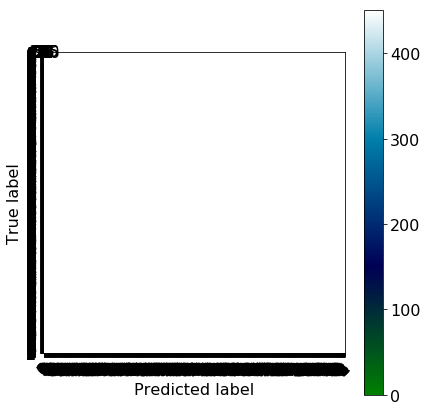

In [25]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.ocean)

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ax.set_title('Confusion Matrix')
    ticks = np.arange(len(y_labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(y_labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(y_labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

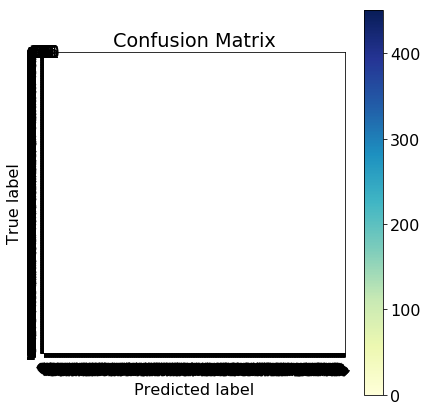

In [30]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

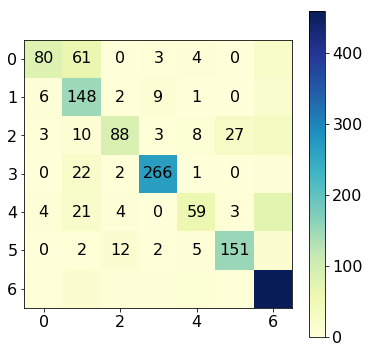

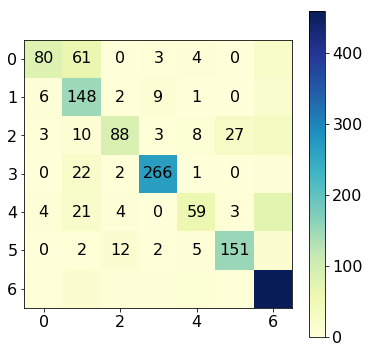

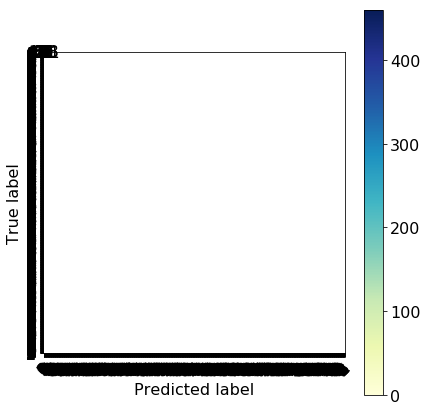

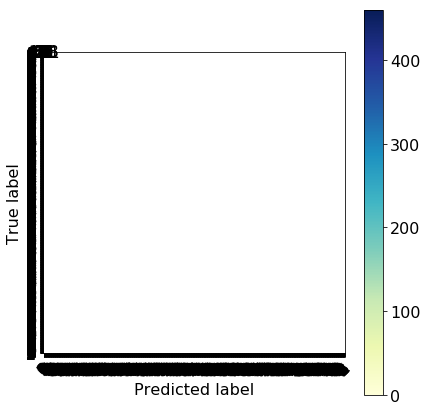

In [14]:
y_labels = [np.argmax(label) for label in y_train]
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [31]:
from keras.models import Model

intermediate_layer_model = Model(inputs=model.input,
                                outputs=model.get_layer('flatten_1').output)

In [34]:
lp=model.predict(x_train)

In [35]:
qp=intermediate_layer_model.predict(x_train)

In [98]:
from sklearn.decomposition import PCA

p=PCA(n_components=2)

dat=p.fit_transform(qp)

x=[]
y=[]
for i in range(0,len(dat)):
   x.append(dat[i][0])
   y.append(dat[i][1])

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

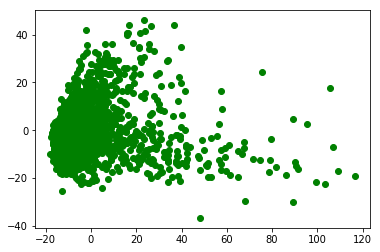

In [99]:
plt.plot(x,y,'go')

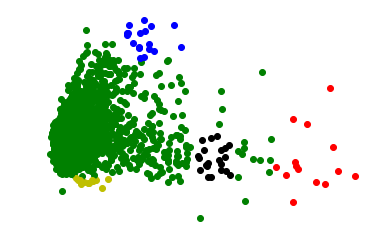

In [101]:

plt.axis("off")
for i in range(0,len(dat)):
    if i in blue:
        b,=plt.plot(x[i],y[i],'bo',label="Neutral")
    elif i in red:
        r,=plt.plot(x[i],y[i],'ro',label='Surprised')
    elif i in yellow:
        yel,=plt.plot(x[i],y[i],'yo',label='Fear')
    elif i in black:
        k,=plt.plot(x[i],y[i],'ko',label='Surprised/scared')
    else:
        g,=plt.plot(x[i],y[i],'go')
plt.savefig("PCA.pdf")

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:532: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9bdbb63e10> has a label of u'_line1670' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


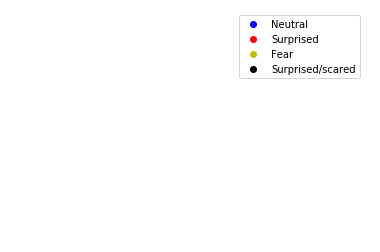

In [102]:
plt.axis("off")
plt.legend(handles=[b,r,yel,k,g])
plt.savefig("legend.pdf")

In [39]:
pl=model.predict(x_train)

In [41]:
pn=np.argmax(pl,axis=1)

In [44]:
yt=np.argmax(y_train,axis=1)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


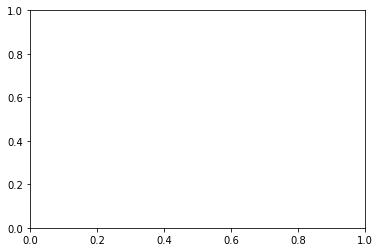

In [85]:
plt.legend()

In [50]:
def getind(xl,xu,yl,yu):
    res=[]
    for i in range(0,len(x)):
        if x[i]>xl and x[i]<xu and y[i]>yl and y[i]<yu:
            res.append(i)
    return res

In [81]:
blue=getind(10,40,30,50)#neutral

In [78]:
red=getind(80,120,-40,40)#surprise

In [79]:
yellow=getind(-10,10,-40,-20)#scared

In [80]:
black=getind(45,62,-30,0)#mixed(Scared and sruprised)

In [75]:
cm

[8,
 9,
 16,
 32,
 127,
 156,
 414,
 499,
 630,
 663,
 664,
 754,
 829,
 833,
 845,
 852,
 1039,
 1212,
 1375,
 1477,
 1624]

In [53]:
def goodImg(ind):
    fig = plt.figure(figsize=(8,10))
    for i in ind:
        input_img = x[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,0,:,:], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

In [56]:
input_img = x_train[cm[0]:1,:,:,:] # subject0
print input_img.shape
plt.imshow(input_img[cm[0],0,:,:], cmap='gray')

(0, 1, 48, 48)


IndexError: index 48 is out of bounds for axis 0 with size 0

In [59]:
x_train[0][0].shape

(48, 48)

In [61]:
x_train[cm[0]][0].shape

(48, 48)

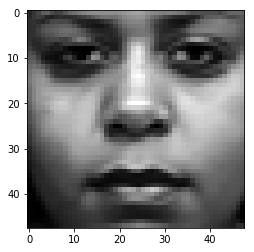

In [62]:
plt.imshow(x_train[cm[0]][0], cmap='gray')

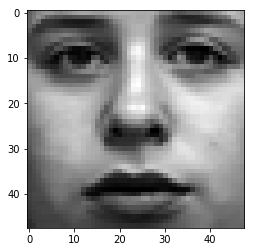

In [63]:
plt.imshow(x_train[cm[1]][0], cmap='gray')

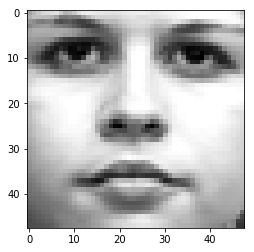

In [64]:
plt.imshow(x_train[cm[2]][0], cmap='gray')

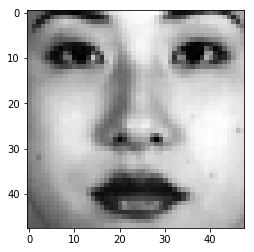

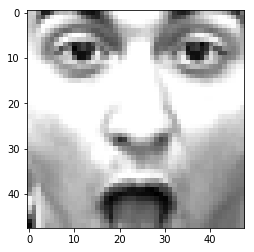

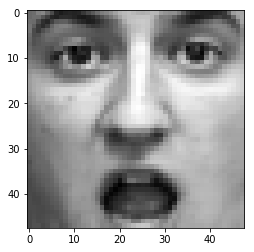

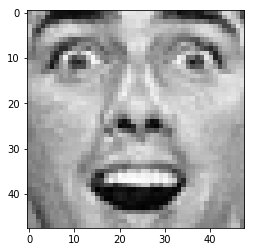

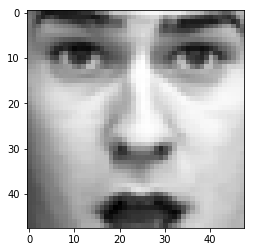

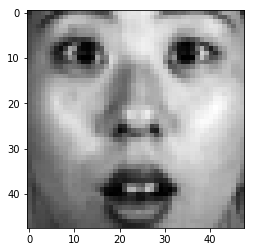

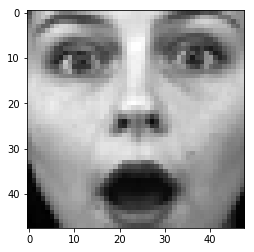

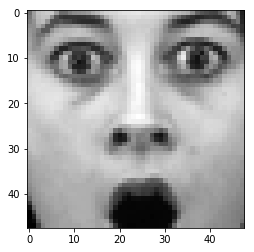

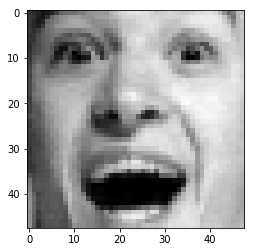

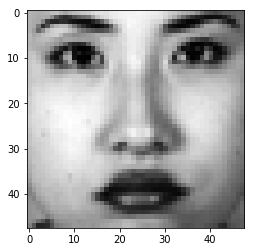

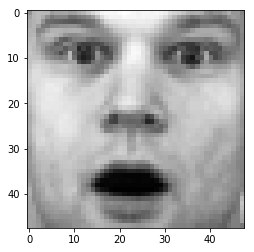

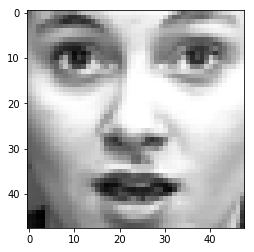

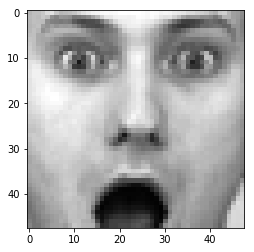

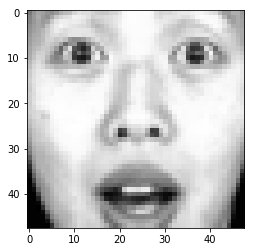

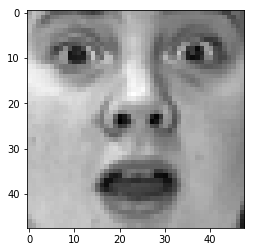

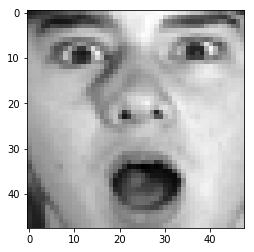

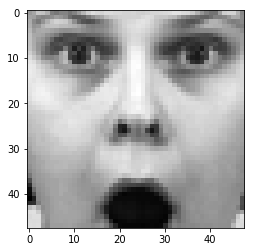

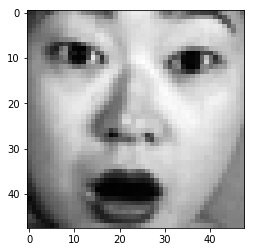

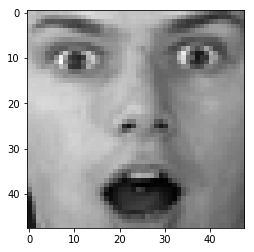

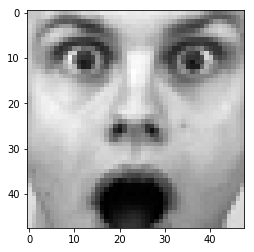

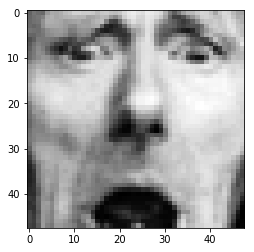

In [76]:
for idx in cm:
    plt.imshow(x_train[idx][0], cmap='gray')
    plt.show()